# GOAL: Car price Prediction
To predict price of a give car
1. Dataset:
2. Using Linear regression


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Cleaning
- Making columns names and data consistent.
- index is special type of dataype
 - `df.columns` gives `Index(['Make', 'Model', ...], dtype='object')`
- `df.columns.str.lower().str.replace(' ', '_')` makes colums consistant.
- df.dtypes
- Series object has index and values.
 - `df.dtypes[df.dtypes == 'object'].index` gives `Index(['make', 'model', '...'], dtype='object') `. We need to convert into list.




In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

Find all string type columns.  
object are strings

In [ ]:
df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [ ]:
df.dtypes[df.dtypes == 'object']

,0
make,object
model,object
engine_fuel_type,object
transmission_type,object
driven_wheels,object
market_category,object
vehicle_size,object
vehicle_style,object


Series has index and values.
`df.dtypes[df.dtypes == 'object'].index` will give a index object. We need to convert into list. We can see as below:  

`Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object') `


In [ ]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

- %matplotlib inline Needes to make sure to be displayed in notebook.
- Long tail distribution
- `numpy.log1p`
- `numpy.exp`
- `df.iloc[[0, 1, 2]]` will take indexes.
- when we do not need index of original dataset
`df_train = df_train.reset_index(drop=True)` not an inplace command

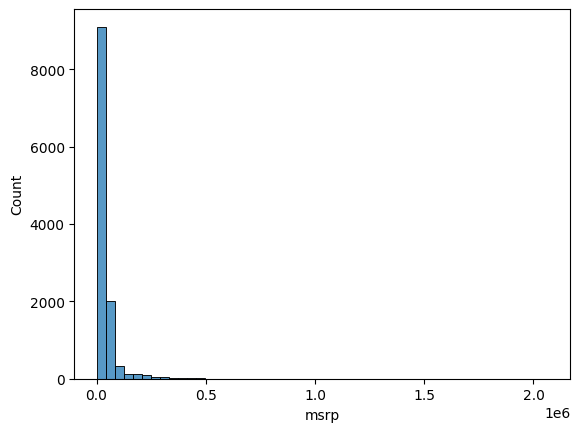

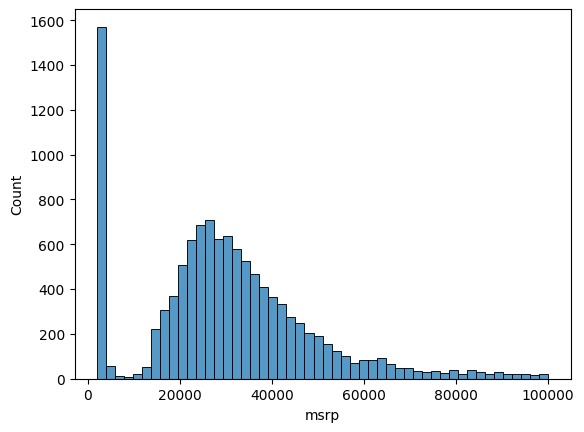

In [ ]:
sns.histplot(df.msrp, bins=50)
plt.show()
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

<Axes: xlabel='msrp', ylabel='Count'>

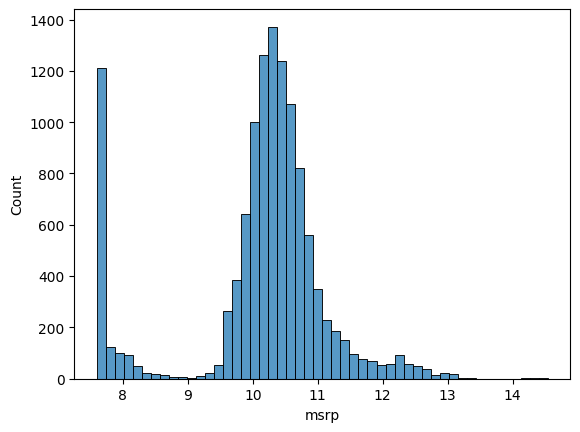

In [ ]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

nan means missing and not a number

In [ ]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


df.iloc[[0, 1, 2]] will take indexes
df.iloc[: 20] etc

In [ ]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val  + n_test)

idx = np.arange(n)

np.random.shuffle(idx)

df_shuffeled = df.iloc[idx]

df_train = df_shuffeled.iloc[: n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val :]

In [ ]:
# when we do not need index of original dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


## Linear regression
g(X) ~ y
g(x_i) = w0 + w1xi1 + w2.xi2

wo bias term: what we predict if we do not anything about car.

w1 if positive has a positive trend with x1


- WTX = XTW = w0 + w1xi1 + w2.xi2
 - W = [w0, w1, w2, ...]
 - X = [1, x1, x2, ...]

- [w0] + w will prepend the w0 in w vector.
 - `w0 = 7.17, w = [ 1.1, 3.4], then
    [w0] + w = [7.17, 1.1, 3.4]`

- np.log1p
-  np.exp1(x) =  np.exp(x) - 1

In [ ]:
def dot(xi, w):
  n = len(xi)

  res = 0

  for j in range(n):
    res = res + xi[j] * w[j]

In [ ]:
w0 = 0
w = [ 1, 2, 3]
xi =[100, 10, 30]
def linear_regression(xi):
  n = len(xi)

  pred = w0

  for j in range(n):
    pred = pred + w[j] * xi[j]

  return pred

In [ ]:
w_new = [w0] + w
def linear_regression(xi):
  xi = [1] + xi
  return dot(xi, w_new)

## training linear regression

- w = inv(XTX).XT.y
 - XTX is called Gramm matrix and is invertible. If cases X has 100 examples with 20 features. X is not a square matrix and can not be inverted. So Gramm matrix is useful.  


In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
train_linear_regression(X, y)

## Baseline model
- we take certain features, build models with them and predict.

In [ ]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [ ]:
# delaing with NaN values
x_train = df_train[base].fillna(0).values


In [ ]:
# Training
w0, w = train_linear_regression(x_train, y_train)

In [ ]:
# prediction
y_pred = w0 + x_train.dot(w)

<Axes: ylabel='Count'>

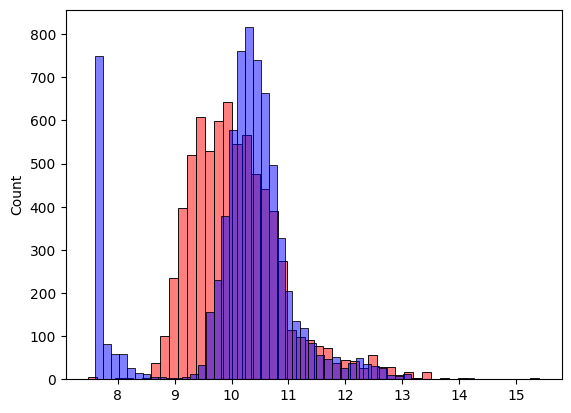

In [ ]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## RMSE

- se.mean()

In [ ]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.7554192603920132

## Validating our model

In [ ]:
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
# train the model
w0, w = train_linear_regression(x_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


0.7728996605739674

## Simple feature engineering by adding more features
 - Add age of the car

In [ ]:
def prepare_X(df):

  df = df.copy()
  df['age'] = 2017 - df.year
  features = base + ['age']

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
# train the model
w0, w = train_linear_regression(x_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5027378534752178

<Axes: ylabel='Count'>

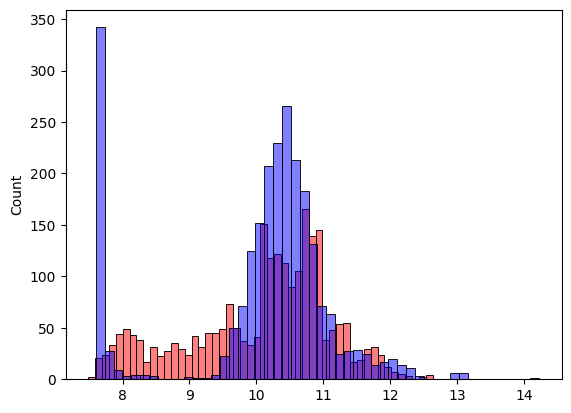

In [ ]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## Categorical variables

- `'num_doors_%s' %4` will give num_doors_4
-  to use dictionary for c, values in categories.items()  

`for c, values in categories.items():
  for v in values:
  df['%s_%s' %(c, v)] = (df[c] == v).astype('int')
  features.append('%s_%s' %(c, v))`
      
`for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
      feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)`

In [ ]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [ ]:
(df_train.number_of_doors == 2).astype('int')

for v in [2, 3, 4]:
  df_train['num_doors_%s' %v] = (df_train.number_of_doors == v).astype('int')


In [ ]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [ ]:
categorical_variables = ['engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category']

categories = {}

for c in categorical_variables:
  categories[c] = list(df[c].value_counts().head().index)

In [ ]:

def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
      for v in values:
        df['%s_%s' %(c, v)] = (df[c] == v).astype('int')
        features.append('%s_%s' %(c, v))


    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
X_train = prepare_X(df_train)
# train the model
w0, w = train_linear_regression(X_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

31.376337988791366

In [ ]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


## Regularisation

We need to take inverse of Gramm martrix and sometimes it does not exist.
When there are duplicate columns then it will happen. So singular matrix.

due to small chnages of some column element. eg 150, 150.00001. Numerically XTX matrix will be calucalted and wont give the error.  

- Solution:
 We add a small number in diagonal

 it make sure no duplicates

 XTX = XTX + λI

 XTX = XTX + 0.01 * np.eye(3)




In [ ]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX =  XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)
# train the model
w0, w = train_linear_regression_reg(X_train, y_train, r= 0.01)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4702726570273806

## Tuning
We check with different r's and select best one and train our model with that and see the score in validation set.

In [ ]:
for r in [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1 ]:
  X_train = prepare_X(df_train)
  # train the model
  w0, w = train_linear_regression_reg(X_train, y_train, r)

  # validation part
  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)

  print(r, w0, rmse(y_val, y_pred))

0.0 2503660711447966.0 31.376337988791366
1e-06 -217.24040830552696 0.47027166373312873
1e-05 10.549699768227793 0.47027157442331874
0.0001 7.785556660075664 0.4702716026636126
0.001 7.791906259733524 0.47027169722888557
0.01 7.779474427221991 0.4702726570273806
0.1 7.6603074415137735 0.4702840984437741
1 6.8942008601414395 0.47064214950545935


In [ ]:
r = 0.001
X_train = prepare_X(df_train)
# train the model
w0, w = train_linear_regression_reg(X_train, y_train, r)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print(rmse(y_val, y_pred))


0.47027169722888557


# Using the model

Train our model in Train + validation
and then test on Test set.  

- `pd.concat([df_train, df_val])`
- `y_full_train = np.concatenate([y_train, y_val])`

In [ ]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
# prepare the test dataset

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.439301649045608

In [ ]:
car = df_test.iloc[20].to_dict()

In [ ]:
car

{'make': 'chevrolet',
 'model': 'silverado_1500',
 'year': 2016,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 285.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'large',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 22,
 'city_mpg': 17,
 'popularity': 1385}

In [ ]:
df_small = pd.DataFrame([car])

In [ ]:
X_small = prepare_X(df_small)

y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred = np.expm1(y_pred)
y_pred

42796.69311659804

In [ ]:
np.expm1(y_test[20])

31035.00000000002